In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kvanillaunet',
           discriminator='cnn',
           activation='sigmoid',
           use_batch_norm=True,
           upsample_mode='simple',
           dropout=0.4,
           dropout_change_per_layer=0.0,
           dropout_type='standard',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

*** GP2 KVanillaUNet ***
Working directory: /tmp/tmp8u46y2crGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final.npy')

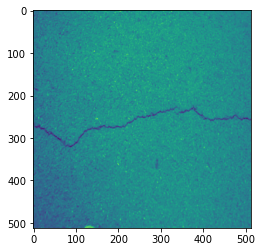

In [5]:
imshow(images[0])

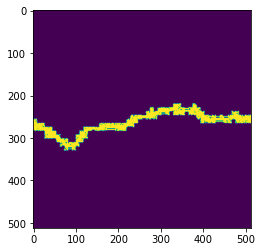

In [6]:
imshow(masks[0])

In [7]:
images = images[:6000]

In [8]:
masks = masks[:6000]

In [9]:
images.shape

(6000, 512, 512, 1)

In [10]:
masks.shape

(6000, 512, 512, 1)

In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [ ]:
R.run(images=images, masks=masks, weights=weights, runs=5)

Weights OK!
******
Loop 0
Epoch 1/100
5/5 [==============================] - 22s 3s/step - loss: 0.8456 - dice_coeff: 0.0993 - val_loss: 0.3926 - val_dice_coeff: 0.1079
Epoch 2/100
5/5 [==============================] - 6s 1s/step - loss: 0.7601 - dice_coeff: 0.1011 - val_loss: 0.3959 - val_dice_coeff: 0.1082
Epoch 3/100
5/5 [==============================] - 6s 1s/step - loss: 0.7294 - dice_coeff: 0.0998 - val_loss: 0.3996 - val_dice_coeff: 0.1084
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 0.7148 - dice_coeff: 0.1012 - val_loss: 0.4033 - val_dice_coeff: 0.1087
Epoch 5/100
5/5 [==============================] - 6s 1s/step - loss: 0.7049 - dice_coeff: 0.1026 - val_loss: 0.4069 - val_dice_coeff: 0.1090
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 0.6974 - dice_coeff: 0.1039 - val_loss: 0.4105 - val_dice_coeff: 0.1092
Epoch 7/100
5/5 [==============================] - 6s 1s/step - loss: 0.6909 - dice_coeff: 0.1067 - val_loss: 0.4139 - va

5/5 [==============================] - 6s 1s/step - loss: 0.5721 - dice_coeff: 0.1536 - val_loss: 0.4377 - val_dice_coeff: 0.1156
Epoch 59/100
5/5 [==============================] - 5s 1s/step - loss: 0.5706 - dice_coeff: 0.1490 - val_loss: 0.4103 - val_dice_coeff: 0.1140
Epoch 60/100
5/5 [==============================] - 6s 1s/step - loss: 0.5680 - dice_coeff: 0.1559 - val_loss: 0.4459 - val_dice_coeff: 0.1156
Epoch 61/100
5/5 [==============================] - 6s 1s/step - loss: 0.5681 - dice_coeff: 0.1522 - val_loss: 0.4275 - val_dice_coeff: 0.1159
Epoch 62/100
5/5 [==============================] - 5s 1s/step - loss: 0.5639 - dice_coeff: 0.1552 - val_loss: 0.4583 - val_dice_coeff: 0.1159
Epoch 63/100
5/5 [==============================] - 6s 1s/step - loss: 0.5625 - dice_coeff: 0.1551 - val_loss: 0.4283 - val_dice_coeff: 0.1147
Epoch 64/100
5/5 [==============================] - 6s 1s/step - loss: 0.5601 - dice_coeff: 0.1563 - val_loss: 0.4489 - val_dice_coeff: 0.1152
Epoch 65/100

Epoch 12/100
6/6 [==============================] - 6s 1s/step - loss: 0.3973 - dice_coeff: 0.2200 - val_loss: 0.3781 - val_dice_coeff: 0.1084
Epoch 13/100
6/6 [==============================] - 6s 1s/step - loss: 0.3909 - dice_coeff: 0.2253 - val_loss: 0.3520 - val_dice_coeff: 0.1064
Epoch 14/100
6/6 [==============================] - 6s 1s/step - loss: 0.3916 - dice_coeff: 0.2208 - val_loss: 0.3786 - val_dice_coeff: 0.1075
Epoch 15/100
6/6 [==============================] - 6s 1s/step - loss: 0.3865 - dice_coeff: 0.2236 - val_loss: 0.3543 - val_dice_coeff: 0.1064
Epoch 16/100
6/6 [==============================] - 6s 1s/step - loss: 0.3869 - dice_coeff: 0.2210 - val_loss: 0.3607 - val_dice_coeff: 0.1058
Epoch 17/100
6/6 [==============================] - 6s 1s/step - loss: 0.3887 - dice_coeff: 0.2186 - val_loss: 0.3619 - val_dice_coeff: 0.1078
Model saved to: /tmp/tmp8u46y2crGP2/kvanillaunet_1kvanillaunet_model
History saved to: /tmp/tmp8u46y2crGP2/kvanillaunet_history_1.pkl
Testing 

In [ ]:
R.classifier_scores

In [ ]:
R.discriminator_scores

In [ ]:
R.plot()